# <center>Digital Image Processing - Problem Set 3</center>

### Student Names:

### Instructions

This Problem Set covers the topics of frequency domain filtering and color image processing.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

In [1]:
# Libraries needed for appropiate working of the functions developed.

import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from os import listdir, path
%matplotlib inline

imagesnames = sorted(listdir('images'))    #Por facilidad de trabajo de todas las imagenes se guardaron los nombres de los archivos
#contenidos en el directorio especificado 
print sorted(imagesnames)
print len(imagesnames)

['Fig6.21(b).jpg', 'babypenguin.jpg', 'badexposure.jpg', 'badexposure2.jpg', 'badexposure3.jpg', 'basketballfield.jpg', 'blown_ic.png', 'blue.png', 'check.png', 'chest.jpg', 'cuadrado.png', 'dark_fountain.jpg', 'dinosaurio.jpg', 'doggy.jpg', 'equalized_fountain.jpg', 'face.png', 'flecha.jpg', 'flowers.jpg', 'fruits.jpg', 'hamster.jpg', 'hiro.jpg', 'landscapebad.jpg', 'lena.jpg', 'lion.jpg', 'messi.png', 'mountain.jpg', 'nebula.jpg', 'nebula2.jpg', 'new_chest.bmp', 'out.png', 'persona.jpg', 'persona2.jpg', 'persona3.jpg', 'punto.png', 'rectangle.png', 'rectangulo.png', 'rectangulo_rotado.png', 'squares.jpg', 'star_wars2.png', 'test_pattern_blurring_orig.png', 'translated_rectangle.png', 'weld_x-ray.jpg']
42


### Problem 1

Visualize the Fourier spectrum of an image. Write a function that visualizes the spectrum of an input gray-scale image. The function should perform the following steps:

1. Compute the FFT of the input image using the FFT function <tt>numpy.fft.fft2</tt>.
2. Shift the transform to center the origin in the middle of the image using <tt>numpy.fft.fftshift</tt>.
3. The Fourier transform contains complex numbers, so we usually analyze its phase and spectrum components. Write commands that compute the Fourier spectrum from the shifted Fourier transform.
4. The resulting spectrum is difficult to visualize if plotted directly. Instead, we usually apply a logarithmic intensity transform to the spectrum before visualizing. Use the <tt>numpy.log</tt> function to accomplish this.
5. Plot the modified spectrum.

Test your function by applying it to the images <tt>face.png</tt>, <tt>blown_ic.png</tt>, <tt>test_pattern_blurring_orig.png</tt>, <tt>translated_rectangle.png</tt> and <tt>rectangle.png</tt>.

Please comment your results.

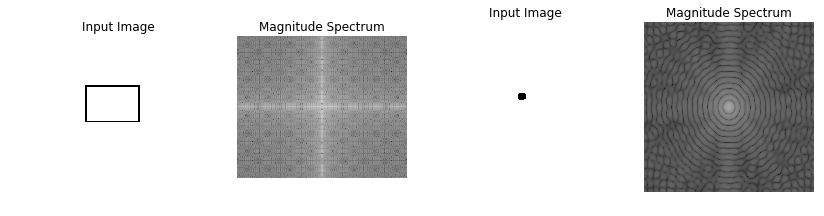

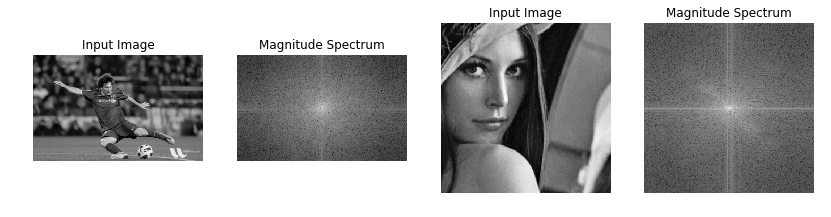

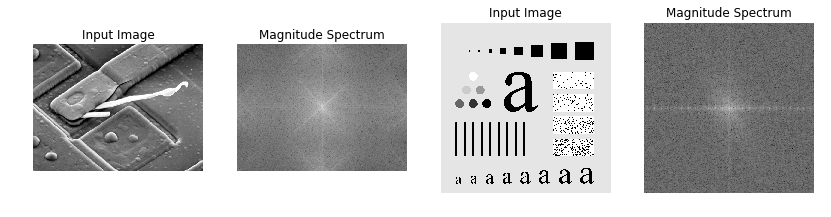

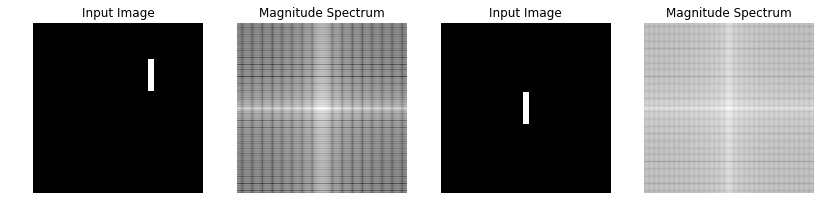

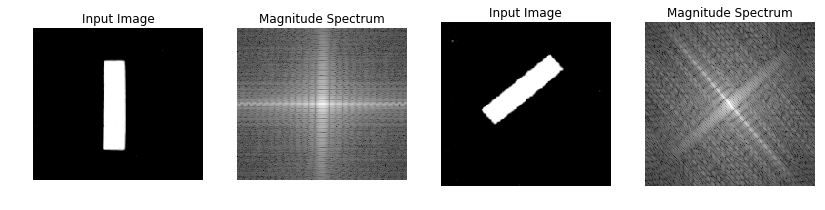

In [2]:
#Define function
#INFORMACIÓN: http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_transforms/py_fourier_transform/py_fourier_transform.html

def fft(img):
    f = np.fft.fft2(img) #FFT of the input image
    f_c = np.fft.fftshift(f) #Center transformation
    height, width = f_c.shape[:2]  #Extract image size from shape function
    for i in range(height):       #Go over every row
            for j in range(width):    #Go over every column
                if np.any(f_c[i,j]==0): #Replace 0 with 10^-10
                    f_c[i,j]=10**-10
    magnitude_spectrum = 20*np.log(np.abs(f_c)) #Find the magnitude spectrum
    return magnitude_spectrum #Return spectrum

    
#Read images
img1 = cv2.imread ('images/cuadrado.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img2 = cv2.imread ('images/punto.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img3 = cv2.imread ('images/messi.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img4 = cv2.imread ('images/face.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img5 = cv2.imread ('images/blown_ic.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img6 = cv2.imread ('images/test_pattern_blurring_orig.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img7 = cv2.imread ('images/translated_rectangle.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img8 = cv2.imread ('images/rectangle.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img9 = cv2.imread ('images/rectangulo.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image
img10 = cv2.imread ('images/rectangulo_rotado.png',cv2.IMREAD_GRAYSCALE).astype("float32") #Load Image

#Compute FFT
magnitude_spectrum1=fft(img1) #Call function
magnitude_spectrum2=fft(img2) #Call function
magnitude_spectrum3=fft(img3) #Call function
magnitude_spectrum4=fft(img4) #Call function
magnitude_spectrum5=fft(img5) #Call function
magnitude_spectrum6=fft(img6) #Call function
magnitude_spectrum7=fft(img7) #Call function
magnitude_spectrum8=fft(img8) #Call function
magnitude_spectrum9=fft(img9) #Call function
magnitude_spectrum10=fft(img10) #Call function
#PLOT
vector_sources = [img1,magnitude_spectrum1,img2,magnitude_spectrum2,img3,magnitude_spectrum3,img4,magnitude_spectrum4,img5,magnitude_spectrum5,img6,magnitude_spectrum6,img7,magnitude_spectrum7,img8,magnitude_spectrum8,img9,magnitude_spectrum9,img10,magnitude_spectrum10]
vector_prop=[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0]
cont = 0;
for i in range(len(vector_sources)/4):
    plt.figure(figsize=(14,14));
    for k in range(4):
        plt.subplot(1,4,k+1);
        plt.imshow(vector_sources[cont],cmap = 'gray');plt.axis('off');
        if(vector_prop[cont]==1):
            plt.title('Input Image')
        else:
             plt.title('Magnitude Spectrum')
        cont += 1;
        
        


<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">La función fft desarrollada en este inciso recibe como parámetro la imagen a la cual se le desea encontrar y visualizar su espectro de Fourier. Esta función retorna el espectro de la imagen ingresada. </p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">Con el propósito de desarrollar este inciso se utilizó la librería OPENCV a través de la cual se ejecutaron distintas funciones, la primera fue la función np.fft.fft2() la cual calcula la Transformada de Fourier discreta bidimensional, esta función tiene como primer argumento una imagen de entrada en escala de grises y el segundo argumento es opcional, que decide el tamaño de la matriz de salida. Si es mayor que el tamaño de la imagen de entrada, la imagen de entrada se rellena con ceros antes del cálculo de FFT. Si es menor que la imagen de entrada, la imagen de entrada se recortará. Si no se especifica este argumento, el tamaño de la matriz de salida será igual que la entrada. Con el resultado obtenido se logra observar que la componente de frecuencia cero (componente DC) está en la esquina superior izquierda, por lo que se desea centrar esta componente. Para esto se debe cambiar el resultado por N/2 en ambas direcciones. Esto es realizado por la segunda función utilizada np.fft.fftshift(), la cual tiene como parámetro de entrada el cálculo de FFT. Luego de realizar esto ya se puede encontrar el espectro de magnitud. Para hallarlo se utilizaron las funciones np.abs() y np.log(), las cuales calculan el valor absoluto y el logaritmo natural respectivamente.</p>
<p style="text-align:justify">Pero se debe tener presente que si se desea hallar el logaritmo de un número este no puede ser cero puesto que este logaritmo no está definido, entonces es necesario condicionar que un valor igual a 0 debe ser reemplazado por un número muy pequeño como lo es 10^-10=0.0000000001. Para esto fue necesario hallar el tamaño de la imagen utilizando la propiedad ".shape" la cual devuelve una tupla conformada por el número de filas, columnas y canales de una imagen. Teniendo en cuenta que solo se desea el alto y ancho de cada imagen, se tomarán entonces los dos primeros elementos de la tupla (img.shape[:2]). Estos elementos son almacenados en las variables height y width, los cuales serán los limites hasta donde se realizará el recorrido de todas las columnas y filas de la matriz, con el fin de reemplazar los valores iguales a cero en la matriz de la FFT centrada de la imagen ingresada.</p>
<p style="text-align:justify">Finalmente, se emplea la función imread() de la librería OPENCV para leer la imagen a la cual se le aplicará la función desarrollada. Esta función lee una imagen cualquiera y recibe dos parámetros: La ruta donde se encuentra la imagen y un indicador que especifica el tipo de color de la imagen cargada.</p>

<h3>- Análisis de resultados:</h3>
<p style="text-align:justify">Una imagen se puede representar como la suma de dos componentes con diferentes escalas espaciales: la imagen con las bajas frecuencias y la imagen con las altas frecuencias. La transformada de Fourier supone que una señal unidimensional se puede descomponer en un conjunto infinito de señales de tipo seno con diferentes frecuencias, amplitudes y fases. El primer componente representa la amplitud media de la señal y tiene frecuencia cero, el siguiente componente presenta la misma frecuencia que la señal original y los demás componentes van adquiriendo frecuencias sucesivamente superiores y se denominan armónicos.</p>
<p style="text-align:justify">En una imagen en el dominio de la frecuencia se sabe dónde se encuentran los distintos rangos de frecuencias. La transformada de Fourier contiene números complejos, por lo que usualmente se analizan sus  componentes de fase y espectro. En la fase reside cada componente sinusoidal en la imagen y el espectro es la representación de las frecuencias que componen la señal, es decir, cuánto de cada componente sinusoidal está presente en la imagen. El espectro de Fourier no debe interpretarse como una imagen, sino como el desplegado en 2D de la potencia (o amplitud) de la imagen original, esto puede observarse claramente en las dos primeras imágenes. En las demás figuras se logra apreciar de manera particular la representación de las frecuencias que componen cada imagen. Finalmente, en los últimos cuatro pares de imágenes se aprecia el efecto de rotación, es decir, si se rota la función F(x,y) a un ángulo determinado, la transformada también será afectada por una rotación del mismo ángulo.</p>

### Problem 2

Frequency domain filtering. Write a PYTHON function that performs high-frequency emphasis (hfe) filtering. Recall that an hfe filter is defined as:
\begin{equation}
H_{hfe}(u,v) = a + b \cdot H_{hp}(u,v)
\end{equation}
where $a$ is the offset, $b$ is the high-frequency amplification and $H_{hp}$ is the transfer function of a high-pass filter. Your function should be based on a second-order high-pass Butterworth filter with a cut-off frequency $D_0$, which is given by:
\begin{equation}
H_{hp}(u,v) = \frac{1}{1 + \left[\frac{D_0}{D(u,v)}\right]^{2n}}.
\end{equation}
<b>Note. </b> $D(u,v)$ measures the Euclidean distance from the point $(u,v)$ to the center of the frequency plane.

Use your function and filters on the image <tt>chest.jpg</tt> to reproduce the image enhancement illustrated below.

<img src="images/chest.jpg"/ width=200> <img src="images/out.png"/width=200>

The outline of the process is the following:

1. Create a high-pass Butterworth filter with a frequency domain dimension of 2 times the size of the input image. Plot the filter image.
2. Compute the FFT of the input image using the function <tt>numpy.fft.fft2</tt>. The FFT should have frequency domain dimensions equal to the dimensions of the filter, which should be set using the input parameters of the <tt>fft2</tt> function. Plot the FFT image.
3. Filter the image using the high-pass Butterworth filter. To filter an image in the frequency domain, you should multiply the fourier transform of the image and the frequency response of the filter. To go back to the spatial domain, you need to apply the inverse FFT and take the real component of the resut. Plot the resulting image.
4. Create a high-frequency emphasis filter based on the Butterworth filter of step 1. Plot the filter image.
5. Filter the image using a high-frequency emphasis filter. Plot the resulting image.
6. After filtering, you may need to stretch the intensity values of each resulting image to the range [0, 255]. You can achieve this by substracting the minimum intensity value, dividing by the maximum and multiplying the result by 255.
7. Apply histogram equalization to the image obtained in the previous step. You should obtain a similar result to that shown above.

Use the following parameters for the filters: $a = 0.5$, $b = 2$, $n=2$ and $D_0$ should be set to $5\%$ of the vertical dimension of the filter.

Please comment your results.

(-0.5, 601.5, 417.5, -0.5)

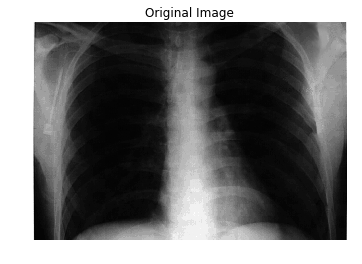

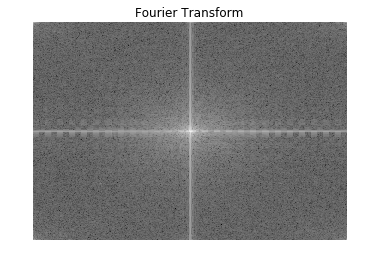

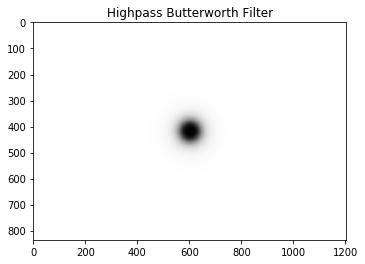

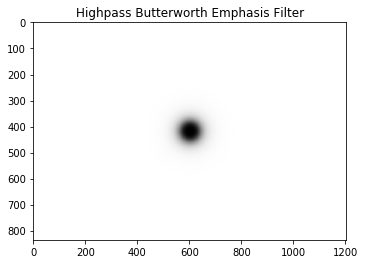

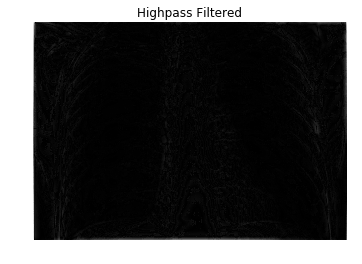

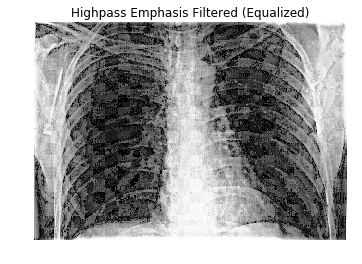

In [3]:
#Define function
def HFempFilter(image, vprct):
    #Convert the image to CV_32F to work with float values
    image = cv2.normalize(image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    height = 2*np.size(image, 0) #Filter's height is twice the image height
    width = 2*np.size(image, 1) #Filter's width is twice the image width
    
    D0 = height*vprct #Cutoff frequency is equal to 0.05*(filter's height)
    #Center coordinates
    X2 = height/2
    Y2 = width/2
    
    transF = np.fft.fftshift(np.fft.fft2(image,[height,width])) #Shifted Fourier Transform with specified frequency domain dimensions
    #Plot the magnitude spectrum
    plt.figure(); plt.imshow(20*np.log(np.abs(transF)), cmap='gray'); plt.title("Fourier Transform");plt.axis('off')
    
    #Build the highpass Butterworth filter
    fil = np.zeros((height,width))
    
    for x in range(0,height):
        for y in range(0, width):
            dist = np.sqrt((x-X2)**2+(y-Y2)**2) #Euclidean distance
            if(dist!=0):
                fil.itemset((x,y), 1 / (1.0 + ( D0 / dist)**(2*2))) #Filter value
    
    #Plot the filters
    plt.figure(); plt.imshow(fil, cmap='gray'); plt.title("Highpass Butterworth Filter")
    plt.figure(); plt.imshow(0.5+2*fil, cmap='gray'); plt.title("Highpass Butterworth Emphasis Filter")
    
    #Apply highpass filter and highpass emphasis filter to the image
    multi1 = np.multiply(transF,fil)
    multi2 = np.multiply(transF,0.5+2*fil)
    
    #Return the image to spatial domain
    filteredA = np.abs(np.fft.ifft2(np.fft.ifftshift(multi1)))
    filteredB = np.abs(np.fft.ifft2(np.fft.ifftshift(multi2)))
    
    #Convert the images to CV_8U format for the equalizing function
    output_simple = cv2.normalize(filteredA[:np.size(image,0),:np.size(image,1)], alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    output_emp = cv2.normalize(filteredB[:np.size(image,0),:np.size(image,1)], alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    
    return [output_simple, output_emp]

imag = cv2.imread("images/chest.jpg", cv2.IMREAD_GRAYSCALE)
#Plot the original image
plt.figure();plt.imshow(imag, cmap='gray'); plt.title("Original Image");plt.axis('off')
simple, emphasis = HFempFilter(imag, 0.05)
#Apply histogram equalization
emphasis = cv2.equalizeHist(emphasis) 

#plot the results
plt.figure(); plt.imshow(simple, cmap='gray'); plt.title("Highpass Filtered");plt.axis('off')
plt.figure(); plt.imshow(emphasis, cmap='gray'); plt.title("Highpass Emphasis Filtered (Equalized)");plt.axis('off')


<h3>- Descripción de la función desarrollada:</h3>
<p style="text-align:justify">
La función desarrollada en este inciso, HFempFilter(), recibe como parámetros de entrada la imagen a la que se le aplicará el filtro y un porcentaje necesario para calcular la frecuencia corte. La función retorna dos imágenes, siendo una la imagen original filtrada con el filtro pasa-altas simplemente y la otra, la imagen original filtrada con el filtro pasa altas con énfasis. Sin embargo, la función también gráfica, durante su ejecución, el espectro en magnitud de la imagen de entrada y los dos filtros utilizados.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
Para el desarrollo de este inciso fueron necesarias las funciones de la librería Numpy correspondientes a la transformada y la transformada inversa de Fourier en 2D, que también se utilizaron en el inciso anterior. Sin embargo, en este inciso se requirió que el tamaño del filtro fuera dos veces el tamaño de la imagen de entrada por lo que al calcular la transformada de Fourier de la imagen de entrada, se debió indicar las dimensiones en frecuencia de la transformada. Esto se logro utilizando el segundo argumento de la función fft.ifft2() de Numpy, en el cual se indican las dimensiones que se desean para la transformada de Fourier resultante. </p>
<p style="text-align:justify">
Ademas de las funciones de Numpy referentes a la transformada de Fourier, fueron importantes para el desarrollo del inciso dos funciones de OpenCV: normalize() y equalizeHist(). La primera, normalize(), fue necesaria para convertir los valores de las imágenes filtradas desde el rango de valores [0,1] al rango de valores [0,255]. Esta función recibe como parámetros de entrada la imagen a normalizar, las cotas inferior y superior así como también el tipo de dato que tendrá la imagen obtenida. Para imágenes cuyos pixeles tengan valores enteros entre 0 y 255, el tipo de dato recomendado es CV_8U. Para imágenes cuyos pixeles tengan valores de punto flotante entre 0 y 1, el tipo de dato recomendado es CV_32F. Esto resulta importante debido a que la siguiente función, equalizeHist(), solo recibe entradas con tipo de dato CV_8U. Esta función, como su nombre lo indica, sirve para aplicar la ecualización de histograma en una imagen. </p>

<h3>- Análisis de resultados: </h3>
<p style="text-align:justify">
Al visualizar el espectro en magnitud de la imagen chest.jpg se puede observar que mucha de la información de esta imagen se encuentra en las bajas frecuencias. Esto se corresponde con el resultado de filtrar la imagen con el filtro pasa altas desarrollado: Gran parte de la imagen se observa atenuada y oscurecida, resaltando unicamente la silueta de la columna y las partes más puntiagudas de las costillas. En la imagen filtrada usando el filtro pasa altas con énfasis se observan más acentuadas las áreas de las costillas y la columna en general. Un efecto que se nota de inmediato es la reducción drástica del difuminado brillante que cubría varias regiones de la imagen original. Los suavizados y difuminados son característicos de las frecuencias bajas así que no sorprende que se reduzcan bastante con la aplicación de un filtro pasa-altas.</p>
<p style="text-align:justify">
Finalmente, al aplicar la ecualización de histograma se visualizan mejor todos los detalles de la imagen que incluso en la imagen original aparecían ensombrecidos, tal como las costillas en medio de la imagen. Sin embargo también se acentúan unas figuras en forma de cuadrado que no eran muy notorias en la imagen original, esto último debido a los efectos de aplicar la ecualización.</p>

### Problem 3

Color spaces. Write a function that converts an image from the RGB color
space to HSI color space. Write another function that converts an image from the HSI
color space to RGB color space. You should use the homework equations to implement these conversions.

When plotting images in the HSI space, you should plot each channel separately, using one image for the H channel, another for the S channel and another for the I channel.

Test your function converting images from RGB to HSI and back to RGB.

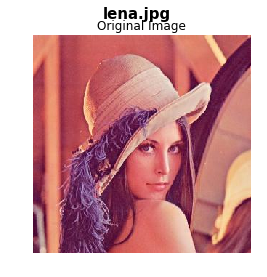

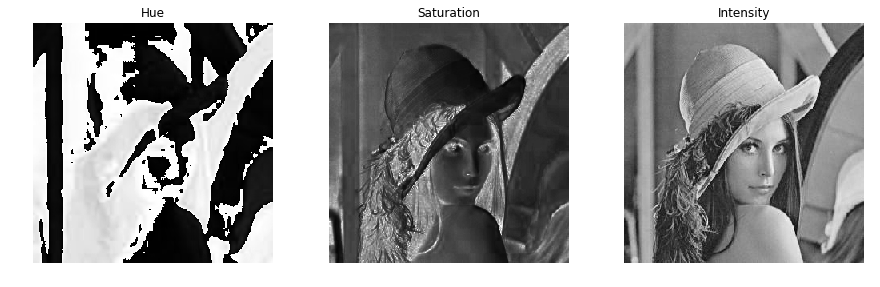

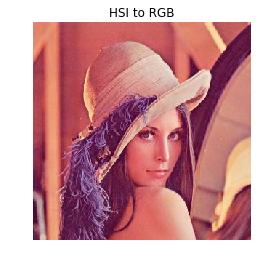

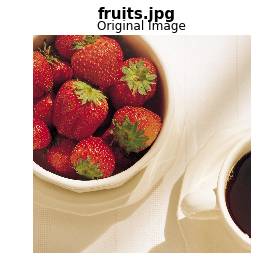

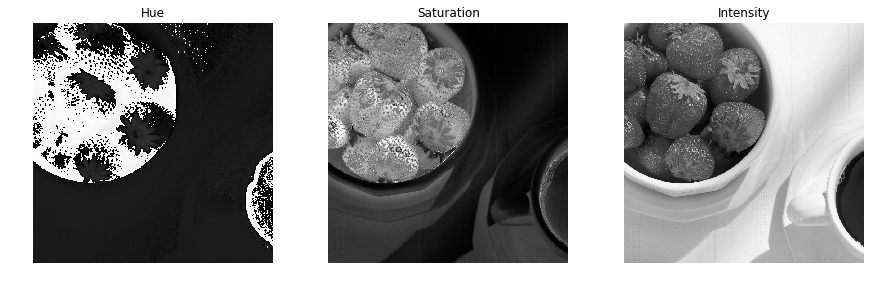

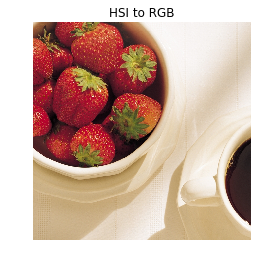

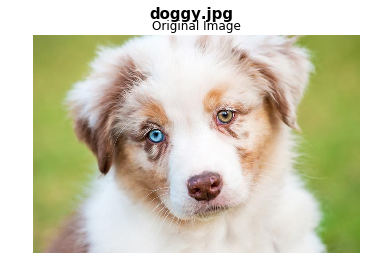

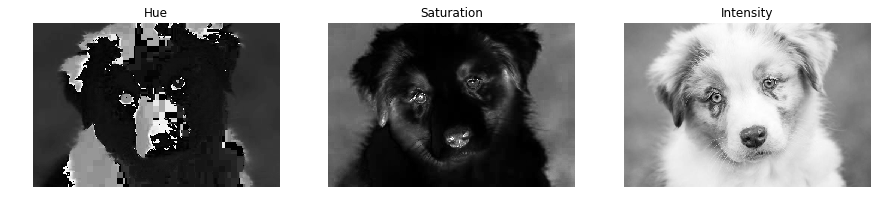

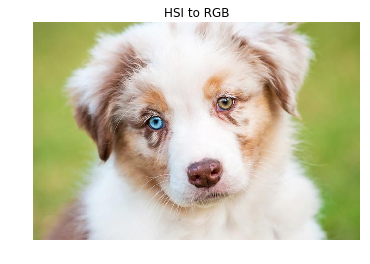

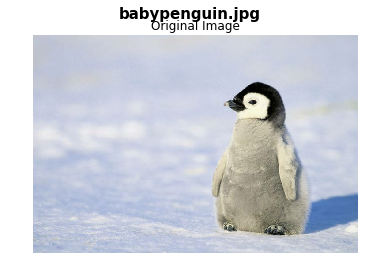

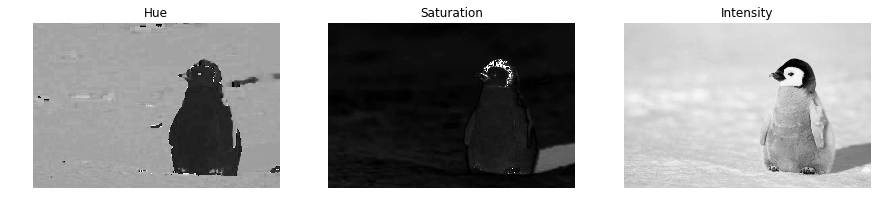

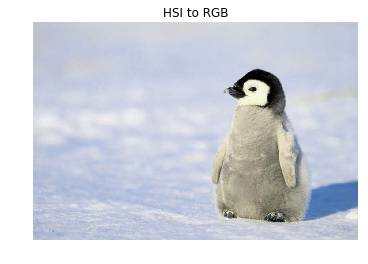

In [4]:
#Define function
def toHSI(image):
    #Get the image size
    height = np.size(image, 0)
    width = np.size(image, 1)
    
    #Define the arrays
    H = np.zeros((height,width))
    S = np.zeros((height,width))
    I = np.zeros((height,width))
    
    #Convert the image to the CV_32 format. Needed for the formulas to work.
    img = cv2.normalize(image, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    for x in range(0, height):
        for y in range(0, width):
            #Store the values in variables to used in the formulas
            R = img.item(x,y,2)
            G = img.item(x,y,1)
            B = img.item(x,y,0)
            I.itemset((x,y),(R+G+B)/3)
            if(R==G and G==B):
                S.itemset((x,y),0)
                H.itemset((x,y),0)
            else:
                w = np.arccos(0.5*((R-G)+(R-B))/(np.sqrt((R-G)*(R-G) + ((R - B)*(G - B)))))
                if(G >= B):
                    H.itemset((x,y),w)

                else:
                    H.itemset((x,y),2*np.pi-w)
         
                    
                if(I[x,y]>0):
                    S.itemset((x,y), 1 - np.amin([R,G,B])/I.item(x,y))
            
                else:
                    S.itemset((x,y),0)
              
    return [H, S, I]

def toRGB(H, S, I):
    #Get the components size. All components have the same size.
    height = np.size(H, 0)
    width = np.size(H, 1)
    #Define the arrays
    R = np.zeros((height,width))
    G = np.zeros((height,width))
    B = np.zeros((height,width))
    for x in range(0, height):
        for y in range(0, width):
            #Store the values in variables to be used in the formulas
            h = H.item(x,y)
            s = S.item(x,y)
            i = I.item(x,y)

            if(h == 0):
                R.itemset((x,y),i+2*i*s)
                G.itemset((x,y),i-i*s)
                B.itemset((x,y),i-i*s)
         
            elif(h > 0 and h < 2*np.pi/3):
                R.itemset((x,y),i + i*s*np.cos(h)/np.cos(np.pi/3-h))
                G.itemset((x,y),i + i*s*(1 - np.cos(h)/np.cos(np.pi/3-h)))
                B.itemset((x,y),i-i*s)
             
            elif(h == 2*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i + 2*i*s)
                B.itemset((x,y),i - i*s)
 
            elif(h > 2*np.pi/3 and h < 4*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i + i*s*np.cos(h-2*np.pi/3)/np.cos(np.pi-h))
                B.itemset((x,y),i + i*s*(1 - np.cos(h-2*np.pi/3)/np.cos(np.pi-h)))
            
            elif(h == 4*np.pi/3):
                R.itemset((x,y),i - i*s)
                G.itemset((x,y),i - i*s)
                B.itemset((x,y),i + 2*i*s)
          
            else:
                R.itemset((x,y),i + i*s*(1 - np.cos(h-4*np.pi/3)/np.cos(5*np.pi/3-h)))
                G.itemset((x,y),i - i*s)
                B.itemset((x,y),i + i*s*np.cos(h-4*np.pi/3)/np.cos(5*np.pi/3-h))
         

    img = cv2.merge([R,G,B]) #Reconstruct the RGB image
    return img

imag1 = cv2.imread("images/lena.jpg")
imag2 = cv2.imread("images/fruits.jpg")
imag3 =  cv2.imread("images/doggy.jpg")
imag4 =  cv2.imread("images/babypenguin.jpg")
vector = [imag1,imag2,imag3,imag4]
vector_names=["lena.jpg","fruits.jpg","doggy.jpg","babypenguin.jpg"]

for i in range(len(vector)):
   
    H, S, I = toHSI(vector[i]) #Get the H,S and I components of the HSI format
    imag2 = toRGB(H,S,I) #Get the RGB image from the HSI components
    imag2 = cv2.normalize(imag2, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #Convert to CV_8U
    
    #Convert from BGR to RGB
    b,g,r = cv2.split(vector[i])
    vector[i] = cv2.merge([r,g,b]) 
    
    plt.figure();plt.suptitle(vector_names[i], fontsize=15,fontweight='bold')  #Title every section of images
    plt.imshow(vector[i]); plt.title('Original Image',fontsize=12);plt.axis('off')
   
    plt.figure(figsize=(15,15)); 
    plt.subplot(3,3,1);plt.imshow(H, cmap='gray'); plt.title('Hue',fontsize=12);plt.axis('off')
    plt.subplot(3,3,2); plt.imshow(S, cmap='gray'); plt.title('Saturation',fontsize=12);plt.axis('off')
    plt.subplot(3,3,3); plt.imshow(I, cmap='gray'); plt.title('Intensity',fontsize=12);plt.axis('off')
    plt.figure(); plt.imshow(imag2, cmap='gray'); plt.title('HSI to RGB',fontsize=12);plt.axis('off')



<h3>- Descripción de la función desarrollada:</h3>

Las funciones desarrolladas en este inciso, toHSI() y toRGB(), transforman una imagen desde el espacio de color RGB a HSI y de HSI a RGB respectivamente. Ambas tienen parámetros de entrada distintos. La función toHSI() recibe como parámetro unicamente la imagen en formato RGB tal y como es leída por la función imread() de la librería OpenCV.  Su parámetro de salida son las tres componentes del formato HSI. La función toRGB() recibe como parámetros las componentes H, S e I de una imagen en formato HSI para retornar la imagen en formato RGB. </p>


<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
Debido a que para la realización exitosa de la conversión entre espacios de color es necesario cambiar el rango de valores de los pixeles de [0, 255] a [0, 1], en el desarrollo de este inciso se utilizó la función normalize(), de la librería OpenCV. Esta función recibe como parámetros de entrada la imagen a normalizar, las cotas inferior y superior así como también el tipo de dato que tendrá la imagen obtenida. Para imágenes cuyos pixeles tengan valores enteros entre 0 y 255, el tipo de dato recomendado es CV_8U. Para imágenes cuyos pixeles tengan valores de punto flotante entre 0 y 1, el tipo de dato recomendado es CV_32F. En la función toHSI(), se usa normalize() para convertir los valores de los pixeles de la imagen original, entre 0 y 255, a valores de punto flotante entre 0 y 1, ya que las formulas utilizadas para obtener los parámetros H, S e I así lo requieren. Tras la función toRGB(), normalize() es utilizado para convertir las componentes R, G y B, obtenidas mediante las formulas, al rango de valores entre 0 y 255.</p>
<p style="text-align:justify">
Otras dos funciones de OpenCV utilizadas en este inciso son split(), que separa un vector multi-canal en sus componentes individuales, y merge(), que crea un vector multi-canal apartir de componentes individuales. Fueron necesarias debido a que la función imread() de OpenCV no retorna una imagen con formato RGB sino BGR, es decir, las componentes B y R se encuentran invertidas dando lugar imágenes con colores distorsionados a la hora de graficarlas. Es por lo anterior que antes de graficar las imágenes se debió separar las componentes de las imágenes leídas con imread() para reordenarlas siguiendo el formato RGB y así poder graficarlas adecuadamente.</p>
<p style="text-align:justify">
Finalmente, se utilizaron funciones de la librería Numpy para lectura y escritura de valores en matrices: item() e itemset(). Estas funciones son invocadas como métodos de los objetos tipo array de Numpy, mismo tipo que maneja OpenCV para las imágenes. Ambos métodos tienen como parámetro de entrada la posición de la celda a la que se va a acceder y en el caso de itemset(), el valor que se va a escribir en la posición de la matriz. El motivo de usar estos métodos en lugar del acceso directo es por la optimización de las funciones de Numpy para la manipulación de vectores. Utilizando las funciones anteriormente mencionadas en este y en los demás incisos, el tiempo que tardaron los algoritmos en completarse se redujo en el mejor de los casos hasta 10 segundos.</p>

### Problem 4

Manipulating color images. Write a function that converts a color image from the RGB to
the HSI color space, modifies the ‘I’ channel by applying histogram equalization, and revert
back the image to the RGB color space. Apply this function to enhance the image <tt>dark_fountain.jpg</tt>.

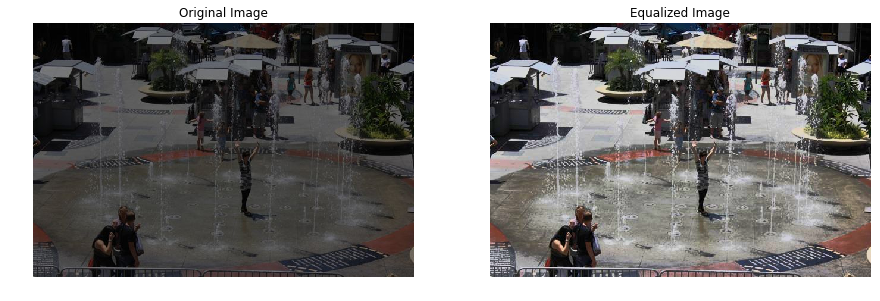

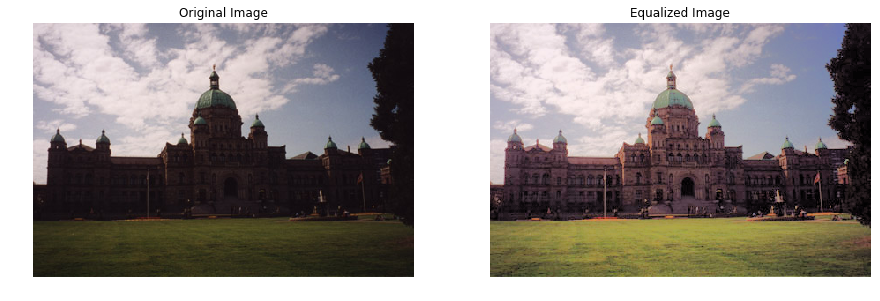

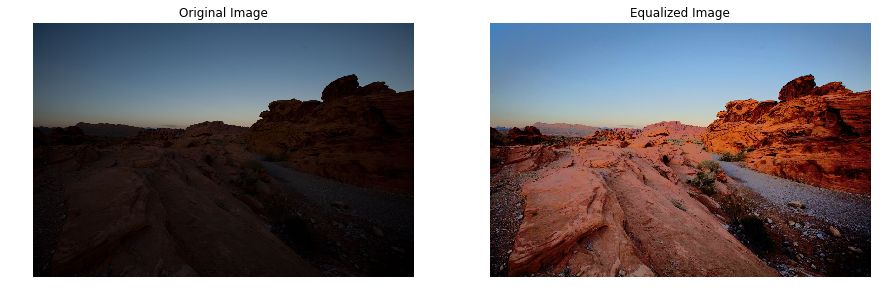

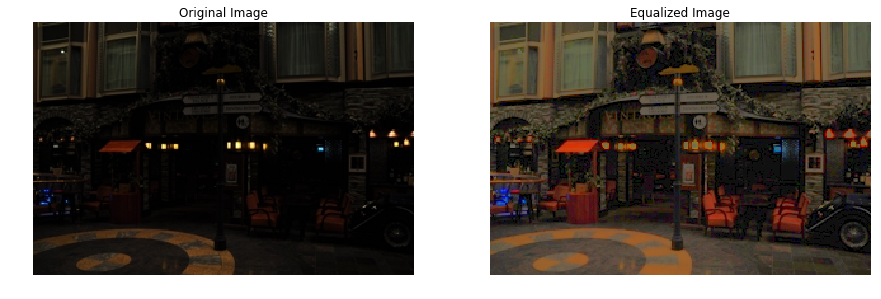

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def equIntensity(image):
    H, S, I = toHSI(image) #Get the H,S and I components
    
    #Convert to CV_8U to use in the equalizing function
    I = cv2.normalize(I, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) 
    I = cv2.equalizeHist(I) #Apply histogram equalization
    #Convert back to CV_32F to use in toRGB()
    I = cv2.normalize(I, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    img = toRGB(H,S,I) #Get the original image with equalized intensity
    
    return img
    

imag1 = cv2.imread("images/dark_fountain.jpg")
imag2 =  cv2.imread("images/badexposure.jpg") 
imag3 = cv2.imread("images/landscapebad.jpg")
imag4 = cv2.imread("images/badexposure3.jpg")
vector = [imag1,imag2,imag3,imag4]
vector_names=["dark_fountain.jpg","badexposure.jpg","landscapebad.jpg","badexposure2.jpg","badexposure3.jpg"]

for i in range(len(vector)):
    imag_equ = equIntensity(vector[i])
    imag_equ = cv2.normalize(imag_equ, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) #Convert to CV_8U
    
    #Plot the results
    plt.figure(figsize=(15,15));
    plt.subplot(1,2,1);plt.imshow(cv2.cvtColor(vector[i], cv2.COLOR_BGR2RGB)); plt.title('Original Image');plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(imag_equ); plt.title('Equalized Image');plt.axis('off')



<h3>- Descripción de la función desarrollada:</h3>   

<p style="text-align:justify">La función desarrollada en este inciso, equIntensity(), recibe como parámetro de entrada una imagen en formato RGB. Esta imagen es convertida al formato HSI, de modo que pueda aplicarse la ecualización de histograma a la componente de intensidad y una vez hecho esto, se convierte al formato RGB para finalmente retornarse como parámetro de salida de la función.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
Para este inciso se utilizaron las funciones desarrolladas en el inciso anterior: toHSI() y toRGB(). La primera es utilizada para obtener las componentes H, S e I de la imagen ingresada. En este caso, la componente de principal interés es la componente I, pues es a la que se aplicará la ecualización de histograma mediante la función equalizeHist() de la librería OpenCV. Como se menciono anteriormente, la función equalizeHist() ecualiza el histograma de la imagen que se le ingrese como parámetro de entrada. Esta imagen debe tener formato CV_8U por lo que antes de ingresar la componente I a la función, se requirió de la función  normalize() de la librería OpenCV para cambiar del formato CV_32F a CV_8U. Una vez aplicada la ecualización de histograma, se volvió a usar la función normalize() en la componente I para retornarla a su tipo de dato original, CV_32F, y se ingresan las componentes H, S e I en la función toRGB() con el objetivo de obtener la imagen final en formato RGB que se retornará y será visualizada posteriormente. </p>


### Problem 5 

Manipulating color images. Consider the RGB color image <tt>squares.jpg</tt>, where the
squares are pure red, green and blue.

<img src="images/squares.jpg" width=200 />

1. Convert this image to the HSI color space. Blur the H component of the image using a 25x25 averaging mask, and convert it back to RGB. How do you explain the obtained result?
2. Repeat, blurring only the saturation component this time. How do you explain the result?


(-0.5, 499.5, 499.5, -0.5)

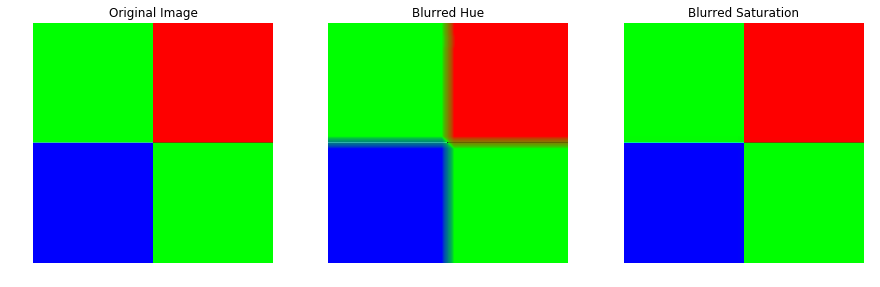

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def blurComponent(image, z):
    H, S, I = toHSI(image) #Get the H, S and I components
    
     #if z == 0, blur the H component. If z == 1, blur the S component.
    if(z == 0):
        H = cv2.blur(H,(25,25))
    elif(z == 1):
        S = cv2.blur(S,(25,25))
           
    img = toRGB(H,S,I) #Get the original image with the blurred component
    img = np.rint(img*255).astype("uint8") #Convert to uint8
    
    return img


imag = cv2.imread("images/squares.jpg")
imag2 = blurComponent(imag,0)
imag3 = blurComponent(imag,1)
imag4 = blurComponent(imag,2)

#Convert from BGR to RGB
b,g,r = cv2.split(imag)
imag = cv2.merge([r,g,b])

#Plot the results
plt.figure(figsize=(15,15)); plt.subplot(3,3,1);plt.imshow(imag); plt.title('Original Image');plt.axis('off'),
plt.subplot(3,3,2); plt.imshow(imag2); plt.title('Blurred Hue');plt.axis('off')
plt.subplot(3,3,3); plt.imshow(imag3); plt.title('Blurred Saturation');plt.axis('off')


<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">La función desarrollada en este inciso, blurComponent(), convierte una imagen al formato HSI de modo que pueda aplicarse una máscara promediante de tamaño 25x25 a las componentes H, S o I que la definen. Cual componente se alterará depende de un indice que se ingresa como parámetro de entrada junto a la imagen. Si este indice es igual a 0, se le aplicará la máscara a la componente H. Si es igual a 1, la máscara se aplicará a la componente S. Independientemente del indice, la función retorna la imagen en formato RGB lista para visualizarse. </p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">En el desarrollo de este inciso se volvió a hacer uso de las funciones toHSI() y toRGB() desarrolladas anteriormente. Una vez obtenidas las componentes H, S e I apartir de la función toHSI(), se determina la componente a la que se le desea aplicar la máscara promediante a partir del indice ingresado a blurComponent(). A esta componente se le aplica la función blur() de la librería OpenCV, la cual aplica una máscara promediante a la imagen que se le ingresa como parámetro de entrada. La función también recibe como parámetro de entrada una tupla con el ancho y el alto de la máscara, en este caso ambos iguales a 25. Finalmente se ingresan las tres componentes a la función toRGB() para obtener la imagen en formato RGB y se retorna lista para ser visualizada.</p>


<h3>- Análisis de resultados:</h3>
<p style="text-align:justify">Cuando se le aplica la máscara promediante a la componente H, se observa como la imagen resultante se difumina bastante en las regiones que separan los distintos cuadrados de la imagen, es decir, donde cambian los colores. Esto es entendible considerando que la componente H de un color es la medida de su ángulo dentro de una rueda de color. Es decir, la componente H del formato HSI, esencialmente, define el color del pixel mientras que las componentes S e I determinan la tonalidad y la intensidad de ese color. Es por lo anterior que al ser promediada la componente H en regiones donde los colores cambian muy abruptamente, tal como en la imagen original, se observa como estos cambios son suavizados.</p>
<p style="text-align:justify">Cuando se le aplica la máscara promediante a la componente S, se observa que los cambios en la imagen resultante son casi imperceptibles. Esto se debe a que en la imagen original casi todos los pixeles tienen la componente S en el máximo valor. Solo unos pocos pixeles tienen un valor diferente, menor al valor máximo. Hay que considerar que el tamaño 25x25 de la máscara promediante significa que el valor de cada pixel será igual al promedio de él junto a otros 624 pixeles circundantes y ya que son muy pocos los pixeles con valor S menor al máximo, es de esperar que la imagen resultante tenga su componente S aun más homogeneizada y cercana al valor máximo. Esto es fácilmente comprobable utilizando una función de Numpy para obtener el valor mínimo de la componente S de la imagen, donde se observa por ejemplo en el caso de la imagen de los cuadrados que antes de aplicarse la función blur(), el valor mínimo de S es aproximadamente igual a 0,3 y al aplicarse la función blur(), el valor mínimo resulta ser igual a 0,97.</p>

## Problem 6

False color. Write a Python function that produces a false color visualization of
the input gray-scale image as follows:

1. If the intensity of an input pixel is lower than a threshold $T$, then the color of the corresponding pixel should be blue.
2. If the intensity of an input pixel is larger or equal than a threshold $T$, then the color of the corresponding pixel should be yellow.

Use your function to reproduce the following result on the image <tt>weld_x-ray.jpg</tt>:

<img src="images/weld_x-ray.jpg" width=200 /> <img src="images/Fig6.21(b).jpg" width=200 /> 

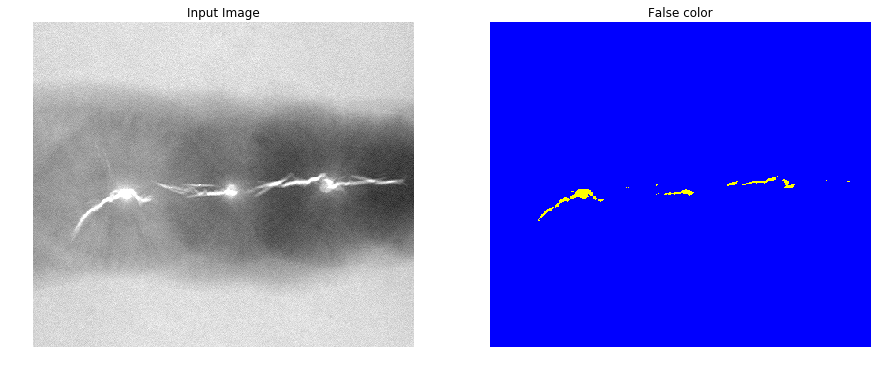

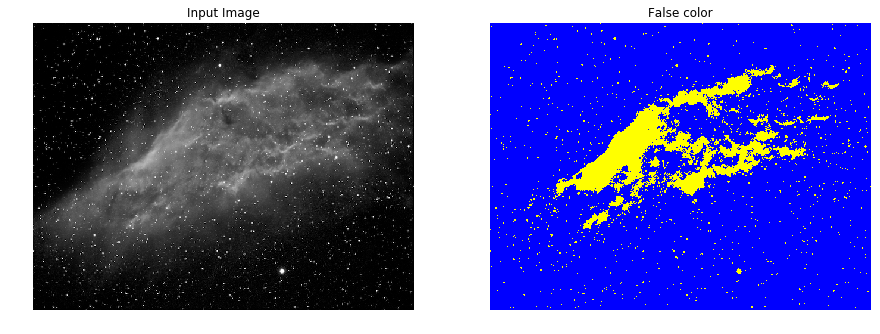

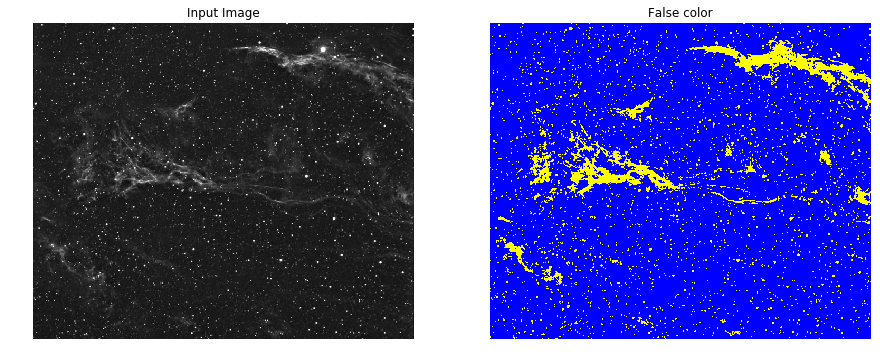

In [ ]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math


def false_color (img,threshold_value):
    img_copy = img.copy()   #Copy image
    height, width = img_copy.shape[:2]  #Extract image size from shape function
    for i in range(height):       #Go over every row
        for j in range(width):    #Go over every column
            if np.any(img_copy[i,j] < threshold_value):   #Find if pixel value is less than threshold value 
                img_copy[i,j] = [0,0,255]    #If this is the case, the color of the corresponding pixel should be blue
            else:
                    img_copy[i,j] = [255,255,0] #Else,the color of the corresponding pixel should be yellow
    return img_copy #Return img

img = cv2.imread("images/weld_x-ray.jpg") # Read images
img1 = cv2.imread("images/nebula.jpg")
img2 = cv2.imread("images/nebula2.jpg")
vector_image = [img,img1,img2]
vector_threshold = [253,103,53] # Define threshold T

for i in range(len(vector_image)):
    plt.figure(figsize=(15,15)); 
    falseColorImg=false_color(vector_image[i],vector_threshold[i]); #Call function
    plt.subplot(2,2,1),plt.imshow(vector_image[i]),plt.title('Input Image');plt.axis('off')  #Display the image
    plt.subplot(2,2,2),plt.imshow(falseColorImg),plt.title('False color');plt.axis('off')  #Display the image




<h3>- Descripción de la función desarrollada:</h3>    
<p style="text-align:justify">La función false_color desarrollada en este inciso recibe dos parámetros: La imagen con la que se trabajará y el valor de umbral que el usuario desee. Esta función retorna una imagen donde se visualiza un falso color de la imagen en escala de grises que se ingresó. </p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3> 
<p style="text-align:justify"> Para desarrollar este inciso primero se realizar una copia de la imagen ingresada utilizando la propiedad ".copy()", esta copia será la imagen con la cual se trabajará. Luego fue necesario hallar el tamaño de la imagen utilizando la propiedad ".shape" y se toman  los dos primeros elementos de la tupla (img.shape[:2]). Estos elementos son almacenados en las variables height y width, los cuales serán los limites hasta donde se realizará el recorrido de todas las columnas y filas la matriz, con el fin de analizar la intensidad de cada píxel de entrada y establecer si es inferior a un umbral T para asignarle un color azul al correspondiente píxel, si no es así el color del píxel será amarillo. Finalmente, se emplea la función imread() para leer la imagen a la cual se le desea aplicar la función desarrollada. </p>



## Problem 7

Green screen effects. Write a function that replaces the green background of the image <tt>hiro.jpg</tt> with a background image of your choice.

<img src="images/hiro.jpg" width=300>

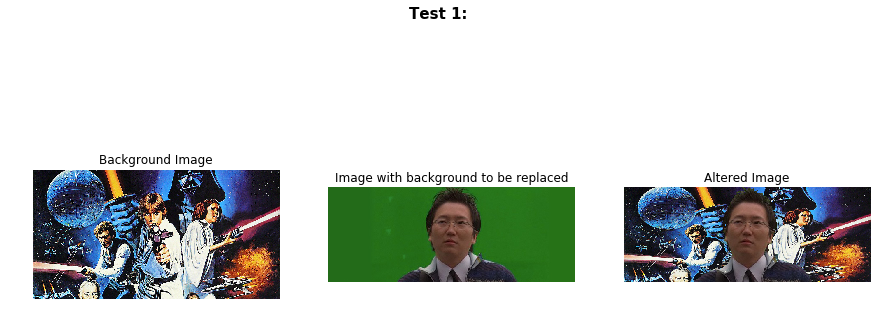

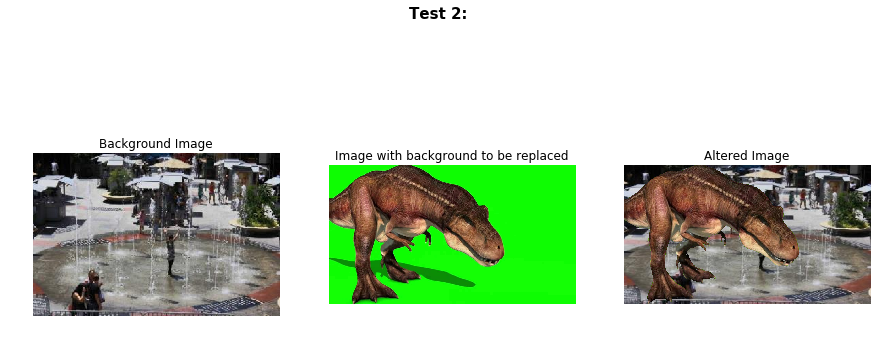

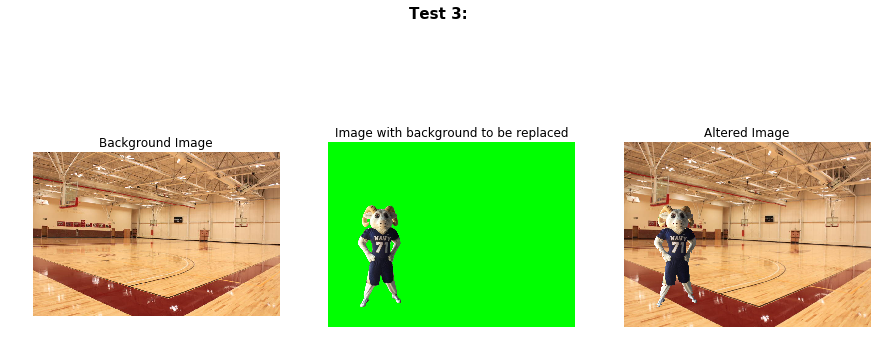

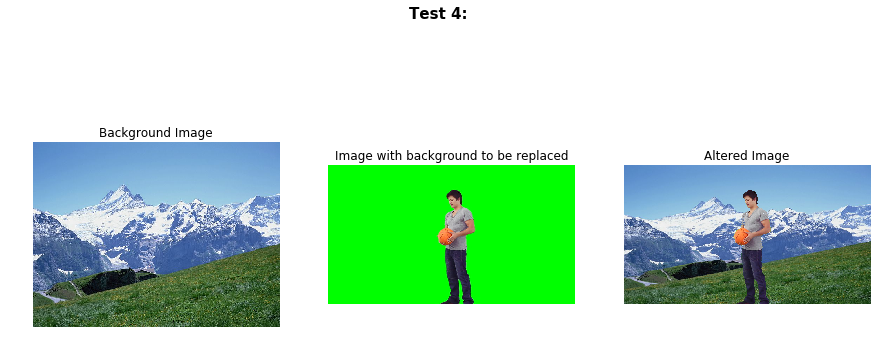

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def Replace(image, image2):
    H, S, I = toHSI(image) #Get the H, S and I components
    
    #Get the image size
    height = np.size(image, 0)
    width = np.size(image, 1)
    
    #Resize the background image to match the first image
    image2 = cv2.resize(image2,(width,height))
    for x in range(0, height):
        for y in range(0, width):
            #If the pixel is green, replace it with the background image equivalent pixel
            if(np.degrees(H[x,y]) > 90 and np.degrees(H[x,y]) < 150):
                image.itemset((x,y,0),image2.item(x,y,0))
                image.itemset((x,y,1),image2.item(x,y,1))
                image.itemset((x,y,2),image2.item(x,y,2))
    return image        
    
imag = cv2.imread("images/hiro.jpg")
imag1 = cv2.imread("images/dinosaurio.jpg")
imag2 = cv2.imread("images/persona3.jpg")
imag3 = cv2.imread("images/persona.jpg")
imaga = cv2.imread("images/star_wars2.png") 
imagb = cv2.imread("images/equalized_fountain.jpg") 
imagc = cv2.imread("images/basketballfield.jpg") 
imagd = cv2.imread("images/mountain.jpg") 


vector_rep = [imag,imag1,imag2,imag3]
vector_back =[imaga,imagb,imagc,imagd]
for i in range(len(vector_rep)):
    #Convert from BGR to RGB and plot the results!
    plt.figure(figsize=(15,15));plt.subplot(3,3,1);plt.imshow(cv2.cvtColor(vector_back[i], cv2.COLOR_BGR2RGB));plt.suptitle('Test '+str((i+1))+':',fontsize=15,fontweight='bold');plt.title('Background Image');plt.axis('off')
    plt.subplot(3,3,2); plt.imshow(cv2.cvtColor(vector_rep[i], cv2.COLOR_BGR2RGB)); plt.title('Image with background to be replaced');plt.axis('off')
    img3 = Replace(vector_rep[i].copy(),vector_back[i])
    plt.subplot(3,3,3); plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)); plt.title('Altered Image');plt.axis('off')

<h3>- Descripción de la función desarrollada:</h3>  
<p style="text-align:justify">
La función desarrollada en este inciso, Replace(), reemplaza los pixeles de color verde de una imagen por los pixeles equivalentes de otra, dando lugar a un efecto de pantalla verde. Esta función recibe como parámetros de entrada dos imágenes, siendo la primera la imagen a la que se le cambiarán los pixeles verdes por los pixeles de la segunda. La función retorna la imagen con el efecto de pantalla verde.</p>

<h3>- Descripción de las funciones de librerías utilizadas:</h3>
<p style="text-align:justify">
Para el desarrollo de este inciso fue necesaria la función toHSI() desarrollada anteriormente. Esto debido a que el formato HSI brinda muchas facilidades para la realización de un paso fundamental en la aplicación que se busca realizar con esta función: La identificacion de un color especifico en una imagen. En el formato RGB, los colores se representan como sumas de rojo, verde y azul, dificultando la diferenciación de un color especifico. En el formato HSI, la componente H define esencialmente el color del pixel mientras que las componentes S e I determinan la tonalidad y la intensidad de ese color. Con este conocimiento se puede verificar el valor de H en cada pixel de la imagen para identificar aquellos que sean del color que se busca. En este caso, se buscan pixeles cuyos valores de H se encuentren entre los 90 y los 150 grados. Todos los pixeles de la primera imagen que cumplen con este requisito son reemplazados por los pixeles de la segunda imagen que se encuentran en la misma posición (fila y columna).
</p>
<p style="text-align:justify">
Para garantizar que un pixel de la primera imagen siempre tenga un pixel equivalente en la segunda imagen, es necesario que ambas imágenes tengan las mismas dimensiones. Para lograr esto se utilizo la función resize() de la librería Numpy, a la cual se le ingresa una imagen y una tupla con dimensiones para obtener la imagen ingresada con las dimensiones especificadas. La imagen a la que se le modificaron las dimensiones fue la segunda imagen ingresada a Replace(), la imagen que sirve como fondo. Finalmente, se utilizo la función degrees() de la librería Numpy para convertir los valores de la componente H de radianes a grados y poder realizar un condicional más fácil de comprender y más acorde a las representaciones comunes de una rueda de color. Notese que la componente H se encuentre originalmente en radianes debido a que las funciones de Numpy utilizadas para calcular el coseno y el arcoseno utilizan los radianes como unidad de medida.</p>